## IPL Data Analysis with complete Dataset(2008-2022)
In this notebook i have tried to perform EDA on IPL DataSet from 2008-2022. DataSet is taken from <a href="https://www.kaggle.com/datasets/biswajitbrahmma/ipl-complete-dataset-2008-2022"/>Kaggle</a>

In [1]:
#import all the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print("Setup Completed....Plz go on...Happy Coding")

Setup Completed....Plz go on...Happy Coding


In [2]:
#load ipl data from csv.
ipl = pd.read_csv("ipl_match_info_data.csv")

In [3]:
ipl.head()

,match_id,season,date,city,venue,team1,team2,toss_winner,toss_decision,player_of_match,...,event,match_number,umpire1,umpire2,reserve_umpire,tv_umpire,match_referee,eliminator,method,date_1
0,335982,2007/08,2008-04-18,Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,BB McCullum,...,Indian Premier League,1.0,Asad Rauf,RE Koertzen,VN Kulkarni,AM Saheba,J Srinath,NaN,NaN,NaN
1,335983,2007/08,2008-04-19,Chandigarh,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,MEK Hussey,...,Indian Premier League,2.0,MR Benson,SL Shastri,MSS Ranawat,RB Tiffin,S Venkataraghavan,NaN,NaN,NaN
2,335984,2007/08,2008-04-19,Delhi,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,MF Maharoof,...,Indian Premier League,3.0,Aleem Dar,GA Pratapkumar,NaN,IL Howell,GR Viswanath,NaN,NaN,NaN
3,335985,2007/08,2008-04-20,Mumbai,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,MV Boucher,...,Indian Premier League,5.0,SJ Davis,DJ Harper,SN Bandekar,AV Jayaprakash,J Srinath,NaN,NaN,NaN
4,335986,2007/08,2008-04-20,Kolkata,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,DJ Hussey,...,Indian Premier League,4.0,BF Bowden,K Hariharan,F Gomes,Asad Rauf,FM Engineer,NaN,NaN,NaN


In [4]:
ipl.shape

(950, 27)

In [5]:
ipl.columns #to print all the columns present in the dataset

#for col in ipl.columns: #We can print in a list as well
    #print(col)

Index(['match_id', 'season', 'date', 'city', 'venue', 'team1', 'team2',
       'toss_winner', 'toss_decision', 'player_of_match', 'winner',
       'winner_wickets', 'winner_runs', 'outcome', 'result_type', 'results',
       'gender', 'event', 'match_number', 'umpire1', 'umpire2',
       'reserve_umpire', 'tv_umpire', 'match_referee', 'eliminator', 'method',
       'date_1'],
      dtype='object')

In [6]:
#let's get the frequency of most player of the match.
ipl['player_of_match'].value_counts()

AB de Villiers       25
CH Gayle             22
RG Sharma            18
DA Warner            18
MS Dhoni             17
                     ..
J Theron              1
AC Voges              1
Mustafizur Rahman     1
NV Ojha               1
RM Patidar            1
Name: player_of_match, Length: 262, dtype: int64

In [7]:
#top 10 player_of_match
ipl['player_of_match'].value_counts()[0:10]

AB de Villiers    25
CH Gayle          22
RG Sharma         18
DA Warner         18
MS Dhoni          17
SR Watson         16
YK Pathan         16
V Kohli           14
SK Raina          14
KA Pollard        14
Name: player_of_match, dtype: int64

In [8]:
#getting all the key values.
list(ipl['player_of_match'].value_counts()[0:10].keys())

['AB de Villiers',
 'CH Gayle',
 'RG Sharma',
 'DA Warner',
 'MS Dhoni',
 'SR Watson',
 'YK Pathan',
 'V Kohli',
 'SK Raina',
 'KA Pollard']

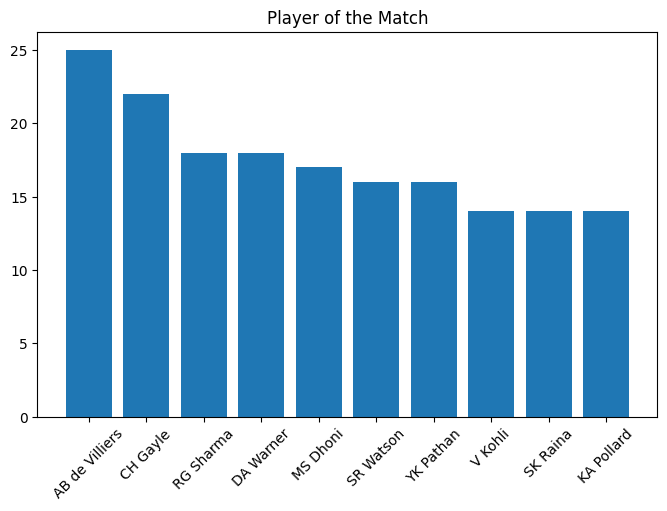

In [9]:
#let's plot a bar chart to represent top 10 player of the match.
plt.figure(figsize=(8,5))
plt.bar(list(ipl['player_of_match'].value_counts()[0:10].keys()),list(ipl['player_of_match'].value_counts()[0:10]))
plt.xticks(rotation=45)
plt.title("Player of the Match")
plt.show()

In [10]:
#we have 3 outcome values as tie, no result and some has NaN
ipl['outcome'].value_counts()

tie          14
no result     4
Name: outcome, dtype: int64

In [11]:
ipl['outcome'] #somewhere outcome is NaN

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
945    NaN
946    NaN
947    NaN
948    NaN
949    NaN
Name: outcome, Length: 950, dtype: object

In [12]:
#create a boolean masking to replace null values in outcome column with 'normal' text as result.
mask = ipl['outcome'].isnull() | (ipl['outcome']=='')

#replace missing values with "Normal"
ipl.loc[mask, 'outcome'] ="normal"


In [13]:
ipl[ipl.columns[13:]].head()

,outcome,result_type,results,gender,event,match_number,umpire1,umpire2,reserve_umpire,tv_umpire,match_referee,eliminator,method,date_1
0,normal,defended,140,male,Indian Premier League,1.0,Asad Rauf,RE Koertzen,VN Kulkarni,AM Saheba,J Srinath,NaN,NaN,NaN
1,normal,defended,33,male,Indian Premier League,2.0,MR Benson,SL Shastri,MSS Ranawat,RB Tiffin,S Venkataraghavan,NaN,NaN,NaN
2,normal,chased,9,male,Indian Premier League,3.0,Aleem Dar,GA Pratapkumar,NaN,IL Howell,GR Viswanath,NaN,NaN,NaN
3,normal,chased,5,male,Indian Premier League,5.0,SJ Davis,DJ Harper,SN Bandekar,AV Jayaprakash,J Srinath,NaN,NaN,NaN
4,normal,chased,5,male,Indian Premier League,4.0,BF Bowden,K Hariharan,F Gomes,Asad Rauf,FM Engineer,NaN,NaN,NaN


In [14]:
ipl['outcome'].value_counts() #now we have 3 outcome values as shown below

normal       932
tie           14
no result      4
Name: outcome, dtype: int64

In [15]:
#lets find out who has won the Toss most number of times
ipl['toss_winner'].value_counts()

Mumbai Indians                 123
Kolkata Knight Riders          114
Chennai Super Kings            109
Royal Challengers Bangalore    105
Rajasthan Royals                99
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             74
Deccan Chargers                 43
Delhi Capitals                  36
Pune Warriors                   20
Gujarat Lions                   15
Gujarat Titans                  10
Punjab Kings                     9
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Lucknow Super Giants             7
Rising Pune Supergiant           6
Name: toss_winner, dtype: int64

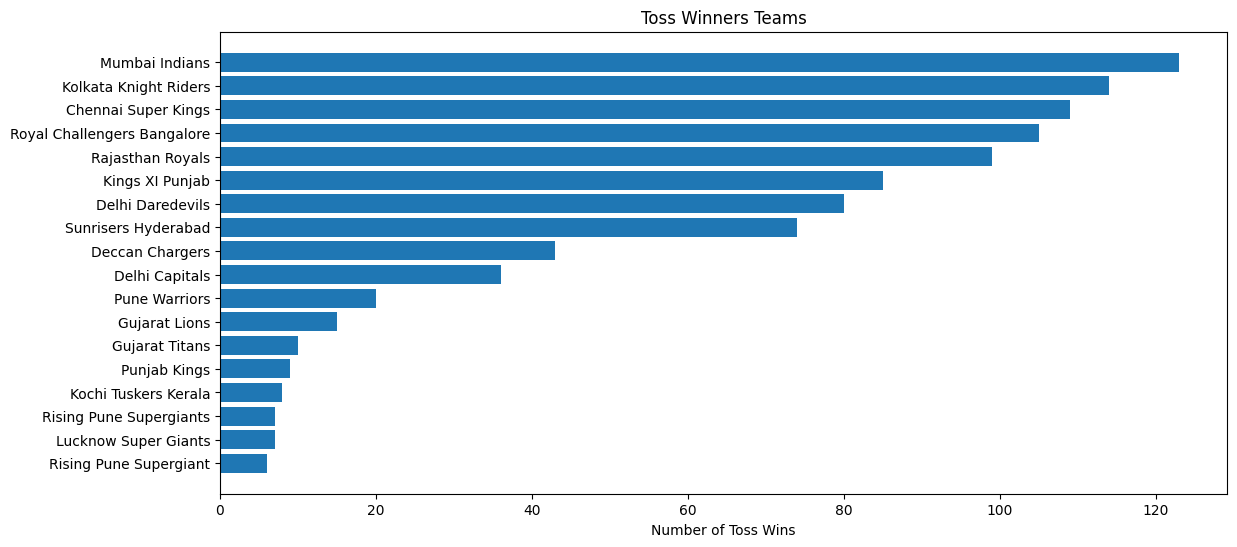

In [16]:
#now we will plot a horizontal bar graph to visualize most toss winners all the time.
plt.figure(figsize=(13,6))
plt.barh(list(ipl['toss_winner'].value_counts().keys()),list(ipl['toss_winner'].value_counts()))
plt.gca().invert_yaxis() # Invert the y-axis to display the bars in descending order
plt.title("Toss Winners Teams")
plt.xlabel("Number of Toss Wins")
plt.show()

In [17]:
#Lets find out who has won the more matches
ipl['winner'].value_counts()

Mumbai Indians                 129
Chennai Super Kings            121
Kolkata Knight Riders          113
Royal Challengers Bangalore    107
Rajasthan Royals                94
Kings XI Punjab                 85
Sunrisers Hyderabad             74
Delhi Daredevils                67
Delhi Capitals                  33
Deccan Chargers                 29
Punjab Kings                    13
Gujarat Lions                   13
Pune Warriors                   12
Gujarat Titans                  12
Rising Pune Supergiant          10
Lucknow Super Giants             9
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [18]:
list(ipl['winner'].value_counts().keys()[:10]) #getting the key values

['Mumbai Indians',
 'Chennai Super Kings',
 'Kolkata Knight Riders',
 'Royal Challengers Bangalore',
 'Rajasthan Royals',
 'Kings XI Punjab',
 'Sunrisers Hyderabad',
 'Delhi Daredevils',
 'Delhi Capitals',
 'Deccan Chargers']

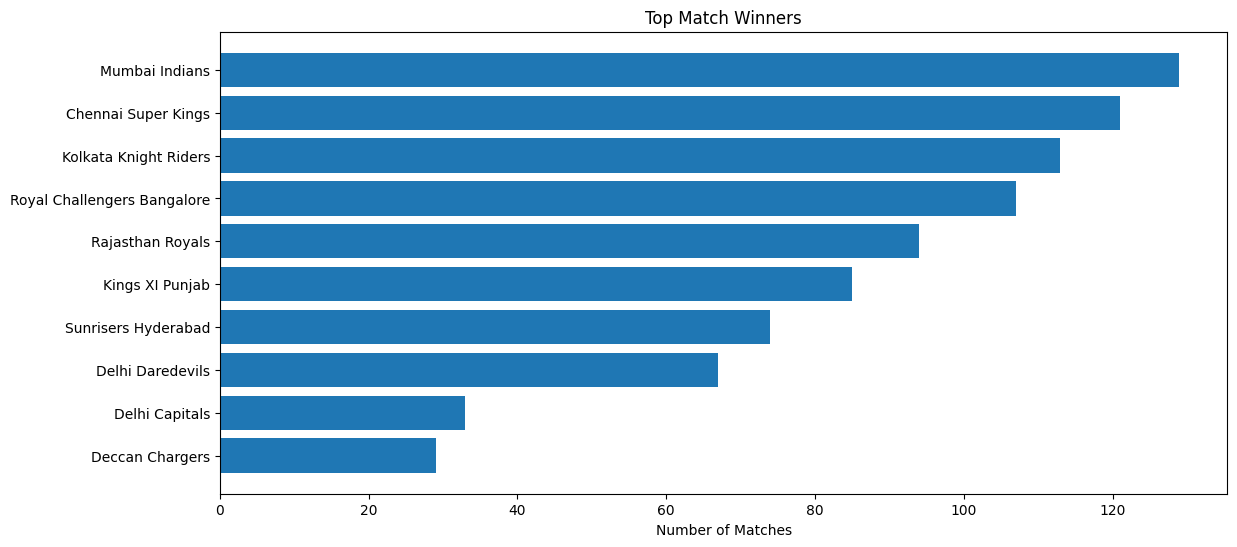

In [19]:
#plotting the horizonal bar graph of Teams who has won more matches
plt.figure(figsize=(13,6))
plt.barh(list(ipl['winner'].value_counts().keys()[:10]),list(ipl['winner'].value_counts()[:10]))
plt.gca().invert_yaxis()
plt.title("Top Match Winners")
plt.xlabel("Number of Matches")
plt.show()

In [20]:
#Teams who has doen batting first and won the matches
batting_first=ipl[ipl['winner_runs']!=0]

In [21]:
batting_first[ipl.columns[9:]].head()

,player_of_match,winner,winner_wickets,winner_runs,outcome,result_type,results,gender,event,match_number,umpire1,umpire2,reserve_umpire,tv_umpire,match_referee,eliminator,method,date_1
0,BB McCullum,Kolkata Knight Riders,0,140,normal,defended,140,male,Indian Premier League,1.0,Asad Rauf,RE Koertzen,VN Kulkarni,AM Saheba,J Srinath,NaN,NaN,NaN
1,MEK Hussey,Chennai Super Kings,0,33,normal,defended,33,male,Indian Premier League,2.0,MR Benson,SL Shastri,MSS Ranawat,RB Tiffin,S Venkataraghavan,NaN,NaN,NaN
7,ML Hayden,Chennai Super Kings,0,6,normal,defended,6,male,Indian Premier League,8.0,DJ Harper,GA Pratapkumar,S Ravi,BF Bowden,FM Engineer,NaN,NaN,NaN
9,KC Sangakkara,Kings XI Punjab,0,66,normal,defended,66,male,Indian Premier League,10.0,Aleem Dar,AM Saheba,HS Sekhon,RE Koertzen,FM Engineer,NaN,NaN,NaN
14,MS Dhoni,Chennai Super Kings,0,13,normal,defended,13,male,Indian Premier League,15.0,BR Doctrove,RB Tiffin,NaN,K Hariharan,J Srinath,NaN,NaN,NaN


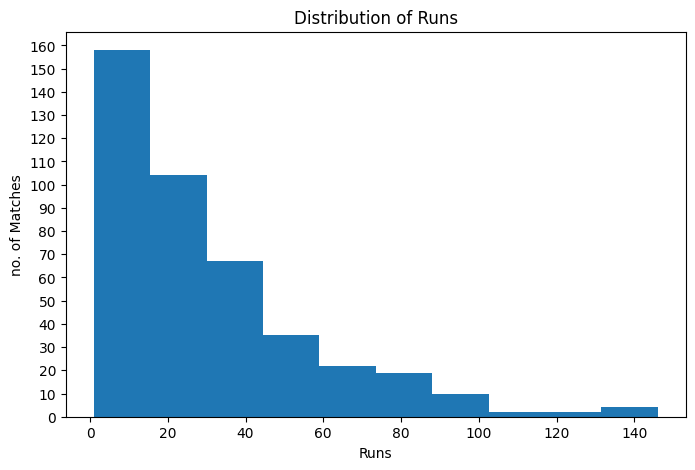

In [22]:
#plot histogram to represent winner runs margin
plt.figure(figsize=(8,5))
plt.hist(batting_first['winner_runs'])
plt.title("Distribution of Runs")
plt.xlabel('Runs')
plt.ylabel('no. of Matches')
plt.yticks(np.arange(0,170,10))
plt.show()

In [23]:
#batting first and number of matches won
batting_first['winner'].value_counts()

Mumbai Indians                 66
Chennai Super Kings            61
Royal Challengers Bangalore    48
Kolkata Knight Riders          45
Kings XI Punjab                40
Rajasthan Royals               37
Sunrisers Hyderabad            36
Delhi Daredevils               25
Deccan Chargers                18
Delhi Capitals                 13
Punjab Kings                    7
Lucknow Super Giants            7
Pune Warriors                   6
Rising Pune Supergiant          5
Gujarat Titans                  4
Rising Pune Supergiants         2
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

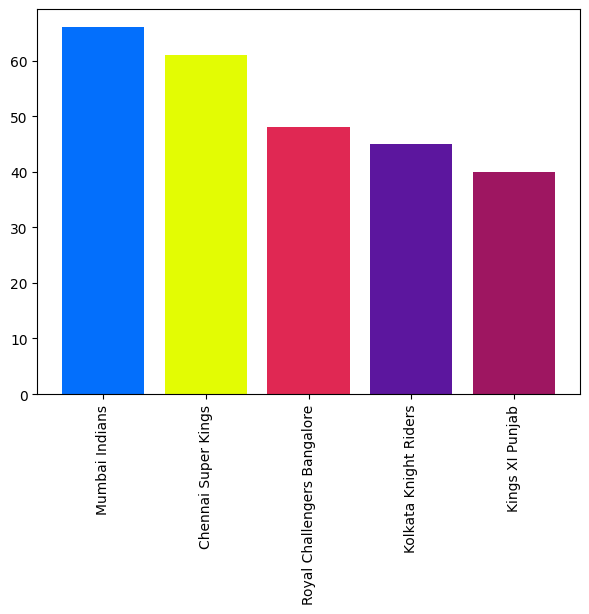

In [24]:
#plot a bar graph to represent top teams who has done batting first and won the match
plt.figure(figsize=(7,5))
plt.bar(list(batting_first['winner'].value_counts()[:5].keys()),list(batting_first['winner'].value_counts()[:5]),
        color=['#036ffc','#e3fc03','#e02853','#5c169e','#9e1661'])
plt.xticks(rotation=90)
plt.show()

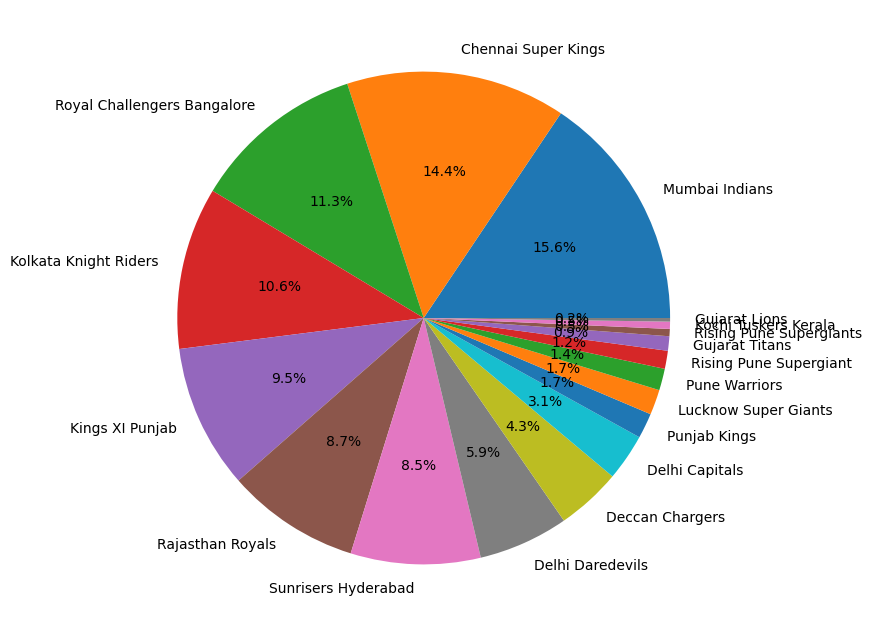

In [25]:
#let's see all time winner in pie chart with percentage
plt.figure(figsize=(8,8))
plt.pie(list(batting_first['winner'].value_counts()),labels=list(batting_first['winner'].value_counts().keys()),
        autopct='%0.1f%%')
#plt.xticks(rotation=30)
plt.show()

In [26]:
#extracting 2nd batting record
batting_second=ipl[ipl['winner_wickets']!=0]

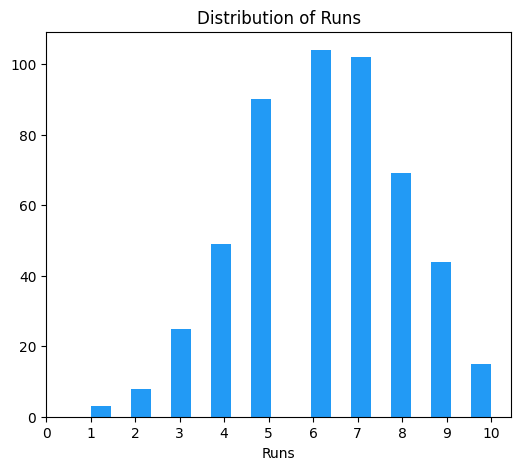

In [27]:
#plot histogram 2nd batting winner
plt.figure(figsize=(6,5))
plt.hist(batting_second['winner_wickets'],bins=20, color='#229af5')
plt.title("Distribution of Runs")
plt.xlabel('Runs')
plt.xticks(np.arange(0,11,1))
plt.show()

In [28]:
batting_second['winner'].value_counts() #batting second winners

Kolkata Knight Riders          68
Mumbai Indians                 63
Chennai Super Kings            60
Royal Challengers Bangalore    59
Rajasthan Royals               57
Kings XI Punjab                45
Delhi Daredevils               42
Sunrisers Hyderabad            38
Delhi Capitals                 20
Gujarat Lions                  12
Deccan Chargers                11
Gujarat Titans                  8
Punjab Kings                    6
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Lucknow Super Giants            2
Name: winner, dtype: int64

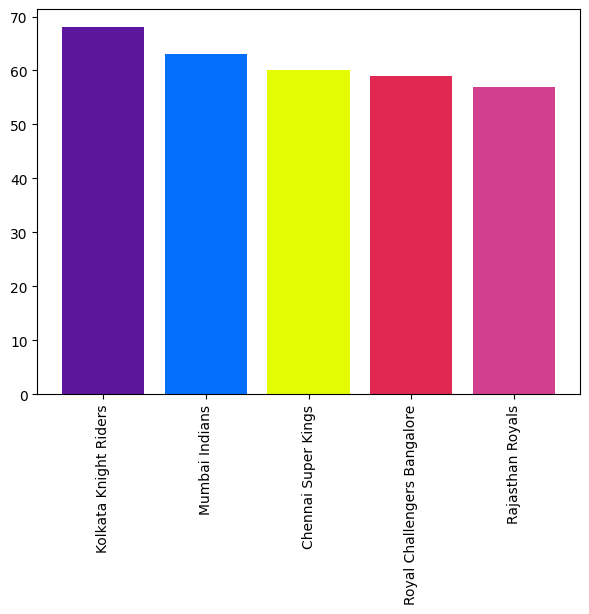

In [29]:
#plot bar graph for 2nd batting winner
plt.figure(figsize=(7,5))
plt.bar(list(batting_second['winner'].value_counts()[:5].keys()),list(batting_second['winner'].value_counts()[:5]),
        color=['#5c169e','#036ffc','#e3fc03','#e02853','#d13f8f'])
plt.xticks(rotation=90)
plt.show()

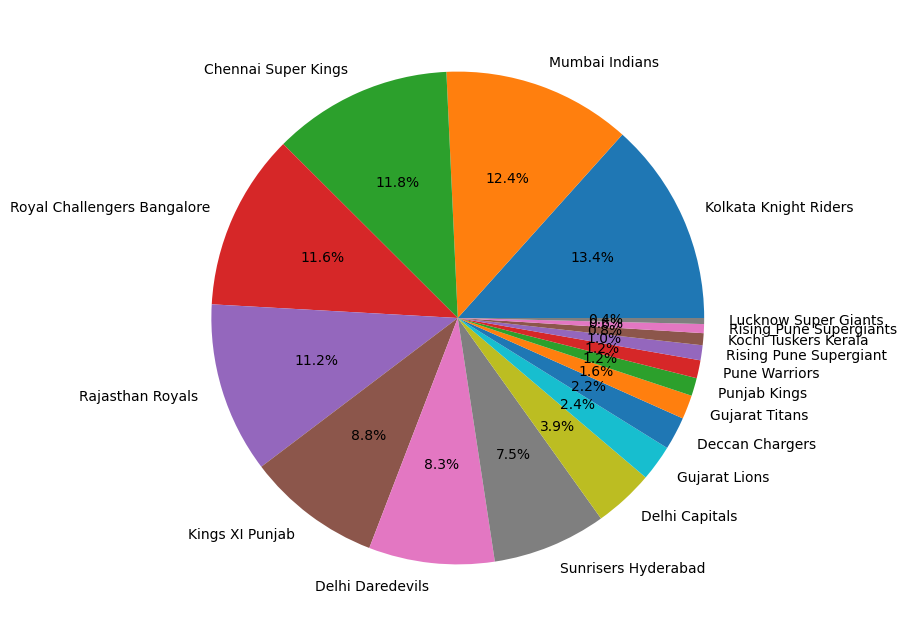

In [30]:
#pie chart of winner by batting 2nd
plt.figure(figsize=(8,8))
plt.pie(list(batting_second['winner'].value_counts()),labels=list(batting_second['winner'].value_counts().keys()),
        autopct='%0.1f%%')
#plt.xticks(rotation=30)
plt.show()

In [31]:
ipl['season'].value_counts() #let's find out the total number of matches in every season.

2013       76
2012       74
2022       74
2011       73
2009/10    60
2014       60
2016       60
2018       60
2019       60
2020/21    60
2021       60
2015       59
2017       59
2007/08    58
2009       57
Name: season, dtype: int64

In [32]:
ipl['city'].value_counts() #number of Matches in every city

Mumbai            159
Kolkata            79
Delhi              78
Chennai            67
Bangalore          65
Hyderabad          64
Chandigarh         56
Pune               51
Jaipur             47
Abu Dhabi          37
Ahmedabad          19
Durban             15
Bengaluru          15
Visakhapatnam      13
Dubai              13
Centurion          12
Sharjah            10
Rajkot             10
Navi Mumbai         9
Dharamsala          9
Indore              9
Johannesburg        8
Cape Town           7
Port Elizabeth      7
Cuttack             7
Ranchi              7
Raipur              6
Kochi               5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

In [33]:
np.sum(ipl['toss_winner']==ipl['winner']) #lets check the probability of toss winner and match winner

483

In [34]:
ipl.shape

(950, 27)

In [35]:
483/950 # we can see there is 50-50 chances who win the toss and won the match

0.508421052631579

### Fetching data from the file where every delivery record is present

In [36]:
#let's read the deliveries csv file, where every ball data is present of all the time.
deliveries = pd.read_csv("ipl_match_ball_by_ball_data.csv")

In [37]:
deliveries.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
#deliveries['match_id'].unique() #number of unique match id's.

In [39]:
match1=deliveries[deliveries['match_id']==335982] #focus on match 1 having match_id =335982

In [40]:
match1.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
match1.shape

(225, 22)

In [42]:
kkr=match1[match1['innings']==1] #let's check the first inning

In [43]:
kkr['runs_off_bat'].value_counts() #total number of runs by all the categories from kkr team

0    45
1    39
4    15
6    14
2    11
Name: runs_off_bat, dtype: int64

In [44]:
kkr['wicket_type'].value_counts() #wickets lost type

caught    3
Name: wicket_type, dtype: int64

In [45]:
kkr['player_dismissed'].value_counts() #players dismissed

SC Ganguly    1
RT Ponting    1
DJ Hussey     1
Name: player_dismissed, dtype: int64

In [46]:
rcb=match1[match1['innings']==2] #rcb 2nd inning data

In [47]:
rcb['runs_off_bat'].value_counts() #total number of runs from all the categories

0    65
1    27
2     3
6     3
4     3
Name: runs_off_bat, dtype: int64

In [48]:
rcb['player_dismissed'].value_counts() #players dismissed

R Dravid      1
V Kohli       1
JH Kallis     1
W Jaffer      1
MV Boucher    1
B Akhil       1
CL White      1
AA Noffke     1
Z Khan        1
SB Joshi      1
Name: player_dismissed, dtype: int64

In [49]:
rcb['wicket_type'].value_counts() #type of wickets how they have dismissed

caught     6
bowled     3
run out    1
Name: wicket_type, dtype: int64

In [50]:
#Let's find out the result type of all the matches
ipl['result_type'].value_counts()

chased       509
defended     423
tie           14
no result      4
Name: result_type, dtype: int64

Here we can see most of the matches has won while chasing the target followed by defended.

In [51]:
ipl['method'].value_counts()

D/L    19
Name: method, dtype: int64

We can see 19 times D/L method has been applied to get the final result of the match

## Now let's check out some important things like who has scored more runs, more wickets.

In [52]:
deliveries['striker'].value_counts()

V Kohli          5266
S Dhawan         5083
RG Sharma        4632
DA Warner        4313
SK Raina         4177
                 ... 
DP Vijaykumar       1
C Nanda             1
Yash Dayal          1
S Kaushik           1
Sunny Gupta         1
Name: striker, Length: 605, dtype: int64

In this above, we can see which player has stayed on striker end most of the times

### Let's find out which player has scored more runs in the IPL till 2022 season

In [53]:
total_runs= deliveries.groupby('striker')['runs_off_bat'].sum()

In [54]:
total_runs=total_runs.sort_values(ascending=False)
total_runs.head(10)

striker
V Kohli           6634
S Dhawan          6244
DA Warner         5883
RG Sharma         5881
SK Raina          5536
AB de Villiers    5181
CH Gayle          4997
MS Dhoni          4978
RV Uthappa        4954
KD Karthik        4377
Name: runs_off_bat, dtype: int64

In [55]:
# #Let's plot the bar graph
# plt.figure(figsize=(8,5))
# plt.bar(list(total_runs.keys()[:10]), list(total_runs.value_counts()[:10]))
# plt.xticks(rotation=90)
# plt.show()

In [56]:
#list(total_runs.value_counts())

In [57]:
#list(total_runs.keys())

In [58]:
deliveries['runs_off_bat']

0         0
1         0
2         0
3         0
4         0
         ..
225949    1
225950    0
225951    1
225952    2
225953    6
Name: runs_off_bat, Length: 225954, dtype: int64

In [59]:
total_runs=total_runs[:10]

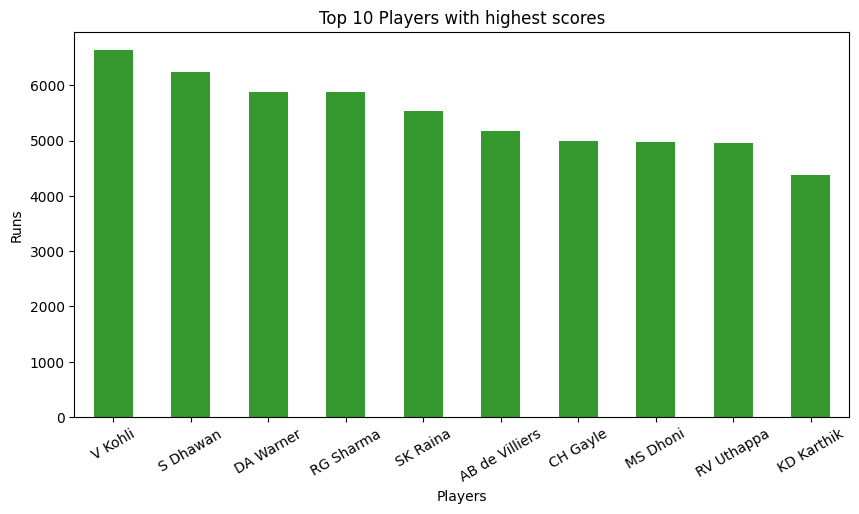

In [60]:
#let's plot the graph of top 10 players who has scored more runs in the ipl till 2022
plt.figure(figsize=(10,5))
total_runs.plot(kind='bar', color='#35992f')
plt.title("Top 10 Players with highest scores")
plt.xlabel('Players')
plt.ylabel('Runs')
plt.xticks(rotation=30)
plt.show()

### Conclusion
Virat Kohli has scored highest runs i IPL till 2022 followed by S Dhawan, DA Warner and RG Sharma etc.

### Now it's time to find out which player has taken more wickets in the IPL till 2022 season

In [61]:
wickets_taken = deliveries.groupby('bowler')['player_dismissed'].count()

In [62]:
wickets_taken=wickets_taken.sort_values(ascending=False)
wickets_taken.head(10)

bowler
DJ Bravo           207
SL Malinga         188
A Mishra           175
R Ashwin           174
YS Chahal          172
SP Narine          171
PP Chawla          165
B Kumar            165
Harbhajan Singh    161
JJ Bumrah          161
Name: player_dismissed, dtype: int64

In [63]:
wickets_taken=wickets_taken[:10]

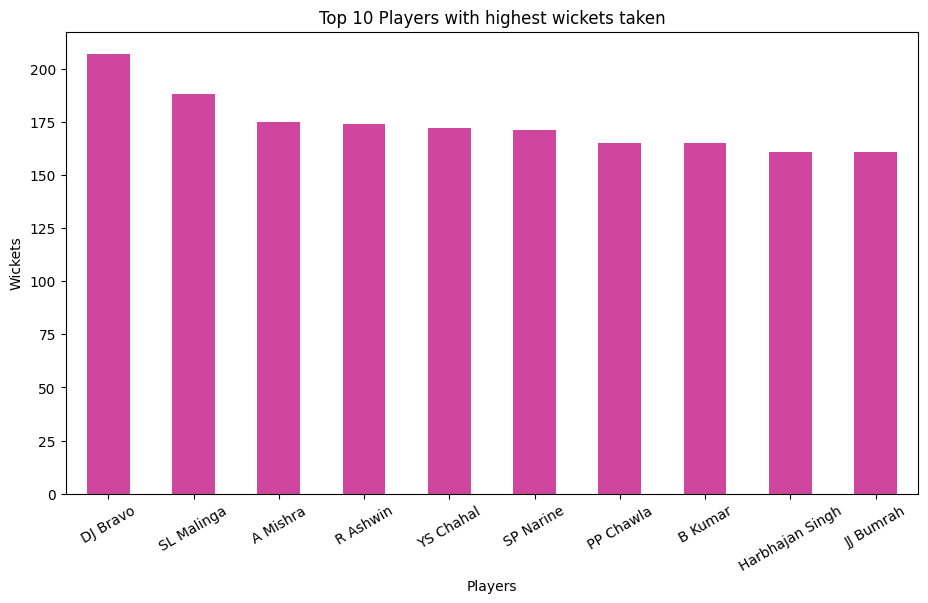

In [64]:
#let's plot the graph of top 10 players who has taken more wickets in the ipl till 2022
plt.figure(figsize=(11,6))
wickets_taken.plot(kind='bar', color='#cf469f')
plt.title("Top 10 Players with highest wickets taken")
plt.xlabel('Players')
plt.ylabel('Wickets')
plt.xticks(rotation=30)
plt.show()

### Conclusion
DJ Bravo has taken the highest number of wickets followed by SL Malinga, A Mishra and R Ashwin etc.

### Finding the Players who has thrown most wide balls 

In [65]:
#finding the most wides thrown by player
total_wides= deliveries.groupby('bowler')['wides'].sum()
total_wides=total_wides.sort_values(ascending=False)

total_wides.head(10)

bowler
DJ Bravo          173.0
SL Malinga        152.0
P Kumar           144.0
R Ashwin          143.0
B Kumar           142.0
UT Yadav          117.0
DW Steyn          110.0
Mohammed Shami    109.0
SN Thakur         104.0
DS Kulkarni       103.0
Name: wides, dtype: float64

In [66]:
total_wides=total_wides[:10]

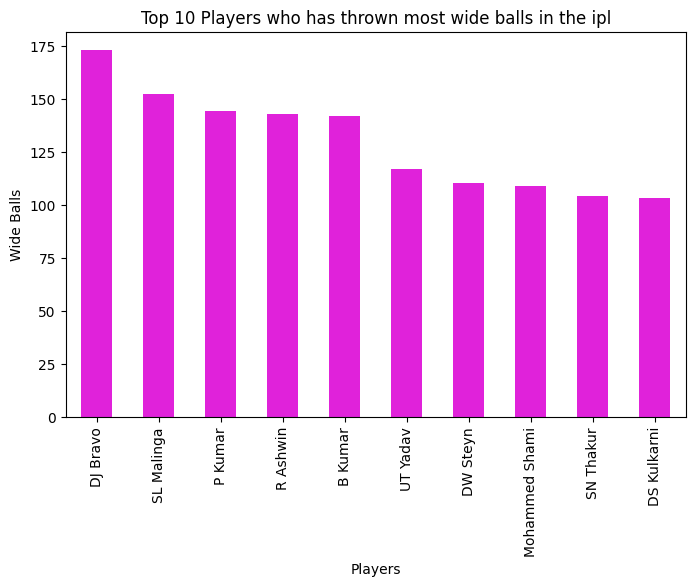

In [67]:
# let's plot the graph to represent the most wide balls thrown by player
plt.figure(figsize=(8,5))
total_wides.plot(kind='bar',color='#e022da')
plt.title('Top 10 Players who has thrown most wide balls in the ipl')
plt.xlabel('Players')
plt.ylabel('Wide Balls')
#plt.xticks(rotation=30)
plt.show()

### Conclusion
DJ Bravo has thrown the most number of wide balls followed by SL Malinga, P Kumar and R Ashwin etc

### Players who has thrown most No balls

In [68]:
no_balls=deliveries.groupby('bowler')['noballs'].sum()
no_balls = no_balls.sort_values(ascending=False)
no_balls.head(10)

bowler
JJ Bumrah            30.0
S Sreesanth          27.0
UT Yadav             25.0
I Sharma             21.0
A Mishra             21.0
SL Malinga           20.0
JA Morkel            18.0
M Prasidh Krishna    17.0
AB Dinda             14.0
SW Tait              14.0
Name: noballs, dtype: float64

In [69]:
no_balls=no_balls[:10]

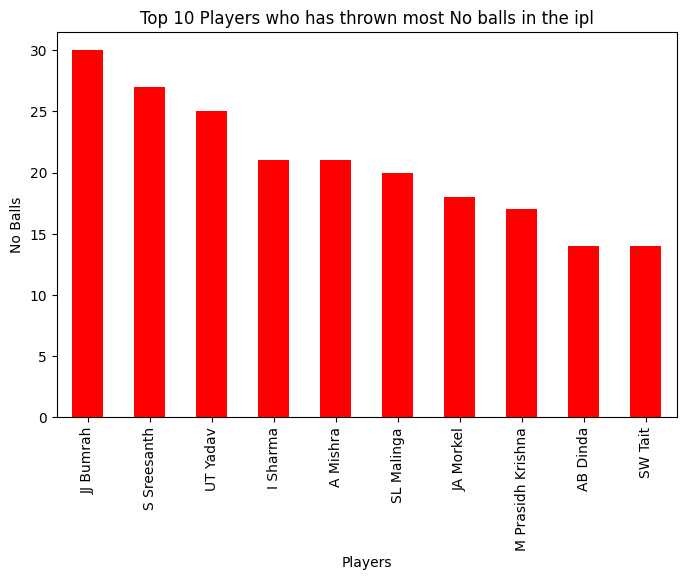

In [70]:
# let's plot the graph to represent the most No balls thrown by player
plt.figure(figsize=(8,5))
no_balls.plot(kind='bar',color='r')
plt.title('Top 10 Players who has thrown most No balls in the ipl')
plt.xlabel('Players')
plt.ylabel('No Balls')
#plt.xticks(rotation=30)
plt.show()

### Conclusion
JJ Bumrah has the highest No balls in the ipl followe by S Sreesanth, UT Yadav and I Sharma etc

## Wickets taken type in IPL

In [71]:
deliveries['wicket_type'].value_counts()

caught                   6837
bowled                   1944
run out                  1007
lbw                       685
stumped                   325
caught and bowled         323
hit wicket                 14
retired hurt               13
obstructing the field       2
retired out                 1
Name: wicket_type, dtype: int64

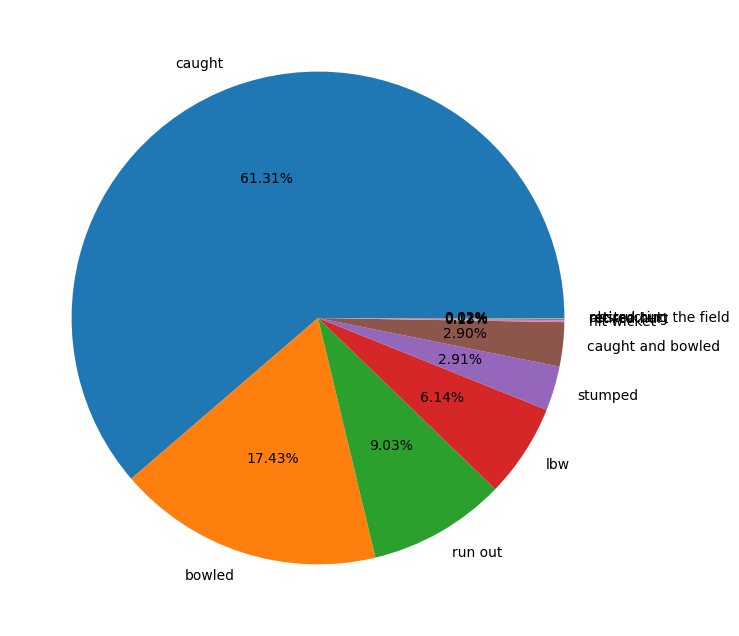

In [72]:
#pie chart of winner by batting 2nd
plt.figure(figsize=(8,8))
plt.pie(list(deliveries['wicket_type'].value_counts()),labels=list(deliveries['wicket_type'].value_counts().keys()),autopct='%0.2f%%')
#plt.xticks(rotation=30)
plt.show()


Most of the times wickets has been taken by Catch followed by Bowled and Run Out etc.

In [73]:
#Number of Matches Played in each Venue till 2022.
deliveries['venue'].value_counts()

Eden Gardens                                            17988
Wankhede Stadium                                        17591
M Chinnaswamy Stadium                                   14907
Feroz Shah Kotla                                        13950
MA Chidambaram Stadium, Chepauk                         11760
Rajiv Gandhi International Stadium, Uppal               11604
Dubai International Cricket Stadium                     11229
Sawai Mansingh Stadium                                  11150
Punjab Cricket Association Stadium, Mohali               8266
Wankhede Stadium, Mumbai                                 7530
Sheikh Zayed Stadium                                     6925
Sharjah Cricket Stadium                                  6672
Maharashtra Cricket Association Stadium                  5294
Dr DY Patil Sports Academy, Mumbai                       4905
Brabourne Stadium, Mumbai                                4057
Dr DY Patil Sports Academy                               3993
Subrata 

In [74]:
deliveries.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
#Wickets taken by players
wickets_players=deliveries.groupby('bowler')['wicket_type'].count()
wickets_players = wickets_players.sort_values(ascending=False)
wickets_players.head(10)

bowler
DJ Bravo           207
SL Malinga         188
A Mishra           175
R Ashwin           174
YS Chahal          172
SP Narine          171
PP Chawla          165
B Kumar            165
Harbhajan Singh    161
JJ Bumrah          161
Name: wicket_type, dtype: int64

In [76]:
#Number of Matches Played in each City.
ipl['city'].value_counts()

Mumbai            159
Kolkata            79
Delhi              78
Chennai            67
Bangalore          65
Hyderabad          64
Chandigarh         56
Pune               51
Jaipur             47
Abu Dhabi          37
Ahmedabad          19
Durban             15
Bengaluru          15
Visakhapatnam      13
Dubai              13
Centurion          12
Sharjah            10
Rajkot             10
Navi Mumbai         9
Dharamsala          9
Indore              9
Johannesburg        8
Cape Town           7
Port Elizabeth      7
Cuttack             7
Ranchi              7
Raipur              6
Kochi               5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64